<a href="https://colab.research.google.com/github/MateusCDev/Python_MachineLearning_Covid19/blob/master/Projeto_Analise_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise COVID-19

##Mateus Cesar de Araujo

Analisando as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo

importando bibliotecas


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

importando dados para o projeto


In [ ]:
url= '/content/drive/MyDrive/dataset projeto covid19/covid_19_data.csv'
df = pd.read_csv(url, parse_dates=["ObservationDate", "Last Update"])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


Verificando tipo de cada coluna

In [ ]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Implementando uma função para corrigir os nomes das colunas.


In [ ]:
import re

def corrige_colunas(col_name):
  return re.sub(r"[/| ]", "", col_name).lower()

In [ ]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [ ]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


Trabalhar com os dados do Brasil para analisar

In [ ]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


Filtrando dados para pegar casos com mais de 0 casos confirmados no Brasil

In [ ]:
brasil = df.loc[
    (df.countryregion == 'Brazil') &
    (df.confirmed > 0)
]

In [ ]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


#Casos Confirmados
. Graficos

In [ ]:
px.line(brasil, 'observationdate', 'confirmed', title = "Casos confirmados no Brasil")

 # Novos casos por dia

In [ ]:
#Programação funcional
brasil["novoscasos"] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [ ]:
# Visualizar
px.line(brasil, x='observationdate', y='novoscasos', title='Novos casos por dia')

#Mortes 

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes',
               mode='lines+markers', line={'color':'black'})
)

#Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

#Taxa de crescimento
taxa_crescimento=(presente/passado)**(1/n) -1

In [ ]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
  # Se data inicio for None, define com a primeira data disponivel

  if data_inicio == None:
      data_inicio = data.observationdate.loc[data[variable]>0].min()
  else:
      data_inicio = pd.to_datetime(data_inicio) 

  if data_fim == None:
      data_fim = data.observationdate.iloc[-1]
  else:
      data_fim = pd.to_datetime(data_fim)

  # Definir os valores do presente passado
  passado = data.loc[data.observationdate == data_inicio, variable].values[0]
  presente = data.loc[data.observationdate == data_fim, variable].values[0]

  #Definir o numero de pontos no tempo em dias 
  n = (data_fim - data_inicio).days

  #Calcular a taxa
  taxa= (presente/passado)**(1/n) - 1

  #Retornando em porcentagem
  return round(taxa*100, 2)



In [ ]:
#Taxa de crescimento medio do COVID no Brasil em todo o periodo
taxa_crescimento(brasil, 'confirmed')

16.27

In [ ]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):

    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)

    data_fim= data.observationdate.max()

    #Definir o numero de pontos no tempo em dias 
    n = (data_fim - data_inicio).days


    #Taxa de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100


In [ ]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [ ]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
px.line(x = pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title="Taxa de crescimento de casos confirmados no Brasil")


#Predições


In [ ]:
import statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [ ]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [ ]:
res= seasonal_decompose(confirmados)

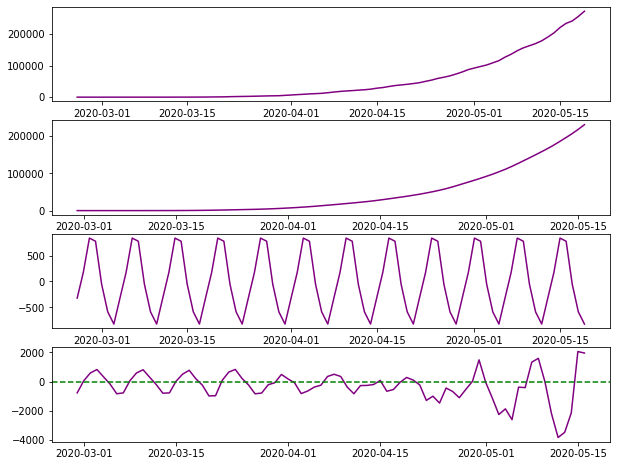

In [ ]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed, c="purple")
ax2.plot(res.trend, c="purple")
ax3.plot(res.seasonal, c="purple")
ax4.plot(confirmados.index, res.resid, c="purple")
ax4.axhline(0, linestyle="dashed", c="Green")
plt.show()

#Modelo ARIMA(Media movel integrada auto reversiva)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 22.4 MB/s 
     |████████████████████████████████| 9.8 MB 24.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [ ]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name="Observados"
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name="Preditos"
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title="Previsão de casos confirmados no Brasil para os proximos 30 dias")
fig.show()

#Modelo de Crescimento

##Usando a biblioteca prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 131 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638617 sha256=eaba821c432489bcf88557c9b47e52a6f97691e1fd0d5a01c01e9e69e0f97c8f
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver

In [ ]:
from fbprophet import Prophet

In [ ]:
my_model = Prophet(interval_width=0.95)
print(my_model.history)

None


In [ ]:
# Preprocessamentos

train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]


#Renomeando colunas
train.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace = True)
test.rename(columns={'observationdate':'ds', 'confirmed': 'y'}, inplace = True)
test = test.set_index("ds")
test = test['y']

#Definir o modelo de crescimento
profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03'
, '2020-05-10'])

#Projeção total da população brasileira
pop = 211463256
train['cap'] = pop

#Treinar o modelo 
profeta.fit(train)

# Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap']=pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x= test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x= train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

#Casos confirmados no Japão

In [53]:
df.loc[df.countryregion == 'Japan']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
35,36,2020-01-22,NaN,Japan,2020-01-22 17:00:00,2.0,0.0,0.0
73,74,2020-01-23,NaN,Japan,2020-01-23 17:00:00,1.0,0.0,0.0
119,120,2020-01-24,NaN,Japan,2020-01-24 17:00:00,2.0,0.0,0.0
160,161,2020-01-25,NaN,Japan,2020-01-25 17:00:00,2.0,0.0,0.0
206,207,2020-01-26,NaN,Japan,2020-01-26 16:00:00,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...
24910,24911,2020-05-15,NaN,Japan,2020-05-16 02:32:19,16203.0,713.0,10338.0
25287,25288,2020-05-16,NaN,Japan,2020-05-17 02:32:32,16237.0,725.0,10338.0
25664,25665,2020-05-17,NaN,Japan,2020-05-18 02:32:21,16285.0,744.0,11153.0
26041,26042,2020-05-18,NaN,Japan,2020-05-19 02:32:18,16305.0,749.0,11564.0


In [54]:
japao = df.loc[(df.countryregion == 'Japan') & (df.confirmed > 0)]
px.line(japao, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Japão')